In [1]:
## Import package
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.interactive(True)
plt.ion()
matplotlib.is_interactive()

True

In [2]:
df = pd.read_csv('Ecommerce_Purchases.csv')
df

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84


In [3]:
# 1/ Find the relationship between top 5 Job designation and total Purchase amount
df_agg = df.groupby(['Job']).agg({'Purchase Price':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
df_agg

,Purchase Price
Job,
Dietitian,1605.30
Lawyer,1603.85
Purchasing manager,1577.97
"Therapist, art",1526.31
Clinical cytogeneticist,1495.92


Text(0, 0.5, 'Total purchase')

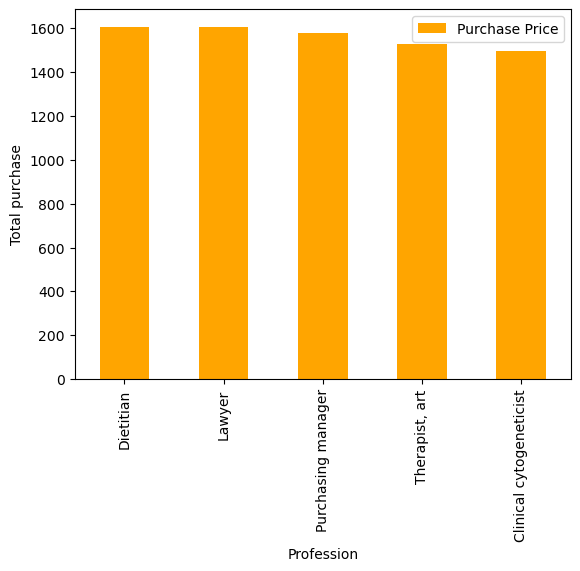

In [4]:
Q1 = df.pivot_table(index = 'Job', values = 'Purchase Price', aggfunc = np.sum).sort_values('Purchase Price',ascending = 0).head(5)
Q1.plot(kind = 'bar',color='orange')
plt.xlabel('Profession', fontsize=10, color='black')
plt.ylabel('Total purchase', fontsize=10, color='black')

Text(0, 0.5, 'Avg Purchase')

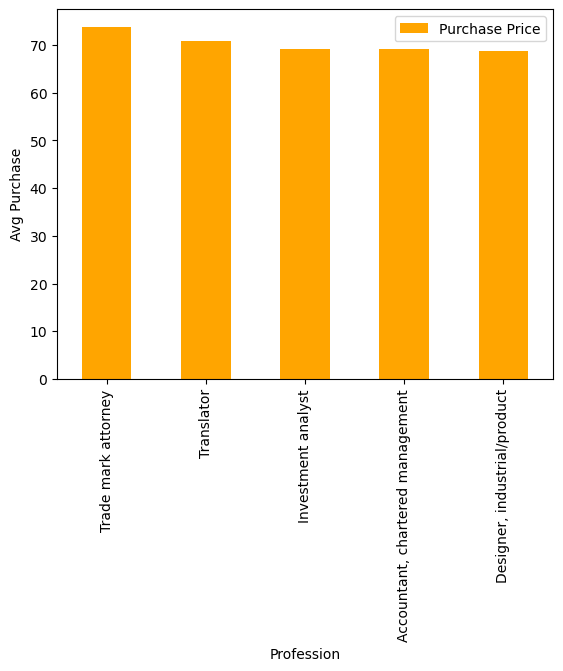

In [5]:
# 2/ Find the relationship between Job designation and mean Purchase amount
Q2 = df.pivot_table(index = 'Job', values = 'Purchase Price', aggfunc = np.mean).sort_values('Purchase Price',ascending = 0).head(5)
Q2.plot(kind = 'bar',color='orange')
plt.xlabel('Profession', fontsize=10, color='black')
plt.ylabel('Avg Purchase', fontsize=10, color='black')


In [39]:
# Q3: How does purchase value depend on the Internet Browser used and Job (Profession) of the purchaser?
df['Browser']= df['Browser Info'].str.split('/').str[0]

Text(0.5, 1.0, 'Browser preferences of largest job groups')

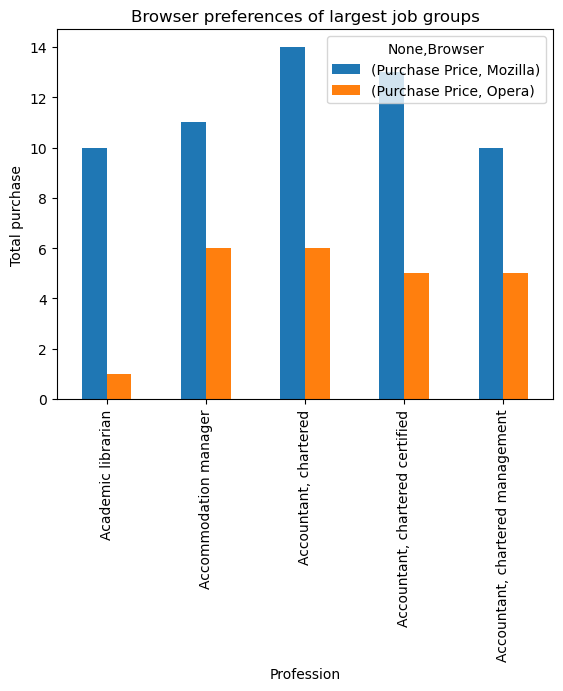

In [63]:
Q3a = df.groupby(['Job','Browser']).agg({'Purchase Price':'count'}).unstack().head(5)
Q3a.plot(kind="bar")
plt.xlabel('Profession', fontsize=10, color='black')
plt.ylabel('Total purchase', fontsize=10, color='black')
plt.title("Browser preferences of largest job groups")

Text(0.5, 1.0, 'Browser preferences of top spending job groups')

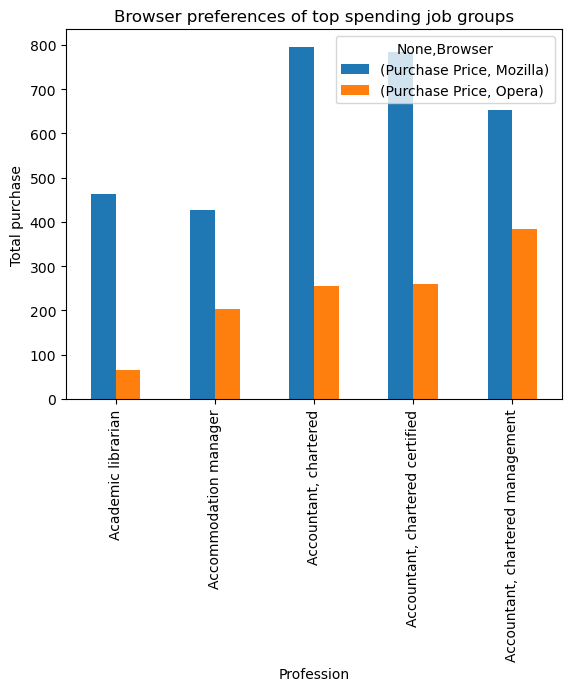

In [64]:
Q3b = df.groupby(['Job','Browser']).agg({'Purchase Price':'sum'}).unstack().head(5)
Q3b.plot(kind="bar")
plt.xlabel('Profession', fontsize=10, color='black')
plt.ylabel('Total purchase', fontsize=10, color='black')
plt.title("Browser preferences of top spending job groups")

In [71]:
# 4/ What are the patterns, if any, on the purchases based on Location (State) and time of purchase (AM or PM)?
df['Location'] = (df['Lot'].str.split().str[1].str.strip())

Text(0.5, 1.0, 'Most purchases done by State (locations and time)')

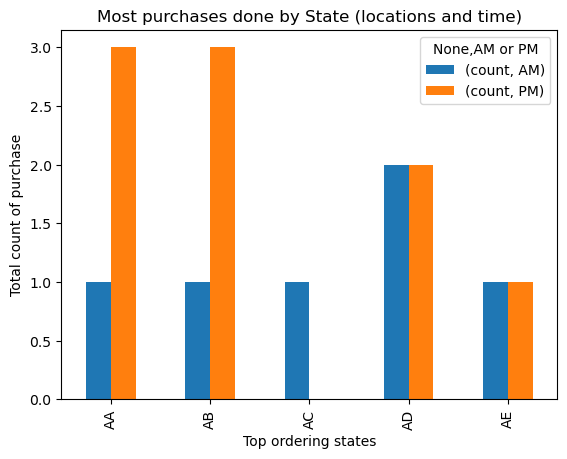

In [76]:
Q4a = df.groupby(['Location','AM or PM'])['Purchase Price'].agg(['count']).unstack().head(5)
Q4a.plot(kind = 'bar')
plt.xlabel('Top ordering states', fontsize=10, color='black')
plt.ylabel('Total count of purchase', fontsize=10, color='black')
plt.title("Most purchases done by State (locations and time)")

Text(0.5, 1.0, 'CC provider usage count at different times')

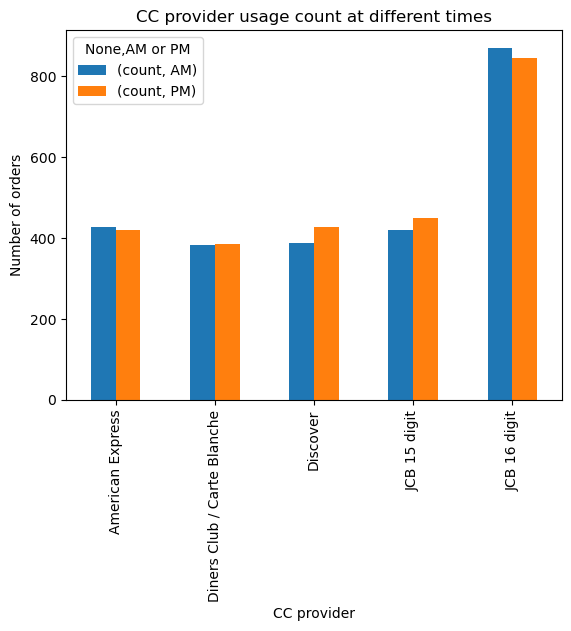

In [77]:
# 5/ How does purchase depend on ‘CC’ provider and time of purchase ‘AM or PM’?
Q5a = df.groupby(['CC Provider','AM or PM'])['Purchase Price'].agg(['count']).unstack().head(5)
Q5a.plot(kind = 'bar')
plt.xlabel('CC provider', fontsize=10, color='black')
plt.ylabel('Number of orders', fontsize=10, color='black')
plt.title("CC provider usage count at different times")

Text(0.5, 1.0, 'CC provider usage value at different times')

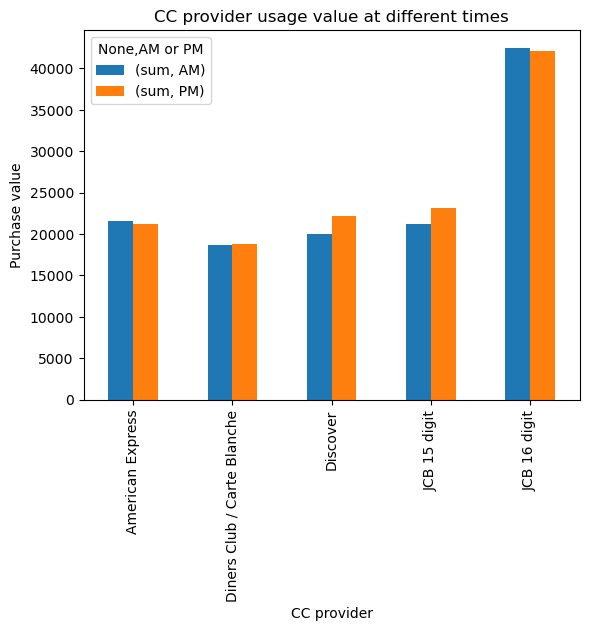

In [78]:
Q5b = df.groupby(['CC Provider','AM or PM'])['Purchase Price'].agg(['sum']).unstack().head(5)
Q5b.plot(kind = 'bar')
plt.xlabel('CC provider', fontsize=10, color='black')
plt.ylabel('Purchase value', fontsize=10, color='black')
plt.title("CC provider usage value at different times")

Text(0.5, 1.0, 'Top most number of purchases done by location(State)')

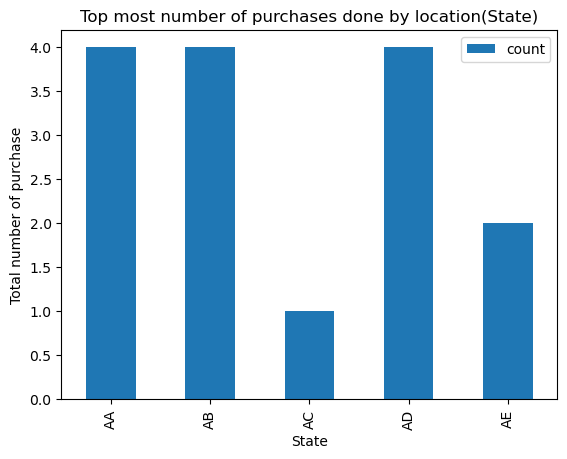

In [85]:
# 6/ What are top 5 Location(State) for purchases?
Q6a = df.groupby(['Location'])['Purchase Price'].agg(['count']).head(5)
Q6a.plot(kind = 'bar')
plt.xlabel('State', fontsize=10, color='black')
plt.ylabel('Total number of purchase', fontsize=10, color='black')
plt.title("Top most number of purchases done by location(State)")

Text(0.5, 1.0, 'Top most number of purchases done by location(State)')

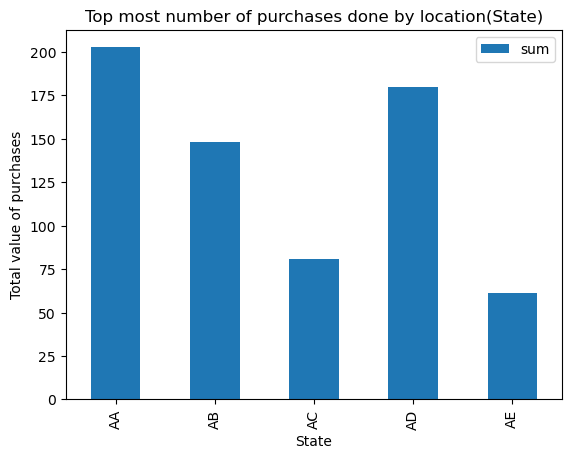

In [86]:
Q6b = df.groupby(['Location'])['Purchase Price'].agg(['sum']).head(5)
Q6b.plot(kind = 'bar')
plt.xlabel('State', fontsize=10, color='black')
plt.ylabel('Total value of purchases', fontsize=10, color='black')
plt.title("Top most number of purchases done by location(State)")